In [45]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [46]:
# Load dataset
df1 = pd.read_csv('RSU50-20249401-DataSet.csv')

# Display the first few rows of the dataset
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCEDATE,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,LASTPAYMENTDATE,NEXTPAYMENTDATE,...,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,PROVINCECODE,POLICY_STATUS
0,NJEV2017-1435,ENDOW,49,5/23/2017,2017,M,24732,CASH,5/23/2017,6/23/2017 0:00,...,0,0,32,M,M,0,0,0,NRWTN,LAPSE
1,NJEV2017-1511,ENDOW,49,5/25/2017,2017,M,24732,CASH,5/25/2017,6/25/2017 0:00,...,0,0,32,M,M,0,0,0,NRWTN,LAPSE
2,NJEV2017-2402,ENDOW,49,9/18/2017,2017,M,24732,CASH,9/18/2017,10/18/2017 0:00,...,0,0,32,M,M,0,0,0,NRWTN,LAPSE
3,NJEV2017-133,ENDOW,49,1/23/2017,2017,M,24732,CASH,1/23/2017,2/23/2017 0:00,...,0,0,32,F,M,0,0,0,NRWTN,LAPSE
4,NJEV2017-2747,ENDOW,49,10/25/2017,2017,M,24732,CASH,10/25/2017,11/25/2017 0:00,...,0,0,32,M,M,0,0,0,ESTRN,LAPSE


In [47]:
print("The shape of the dataframe is: {}".format(df1.shape))

The shape of the dataframe is: (175791, 26)


In [48]:
df1.columns

Index(['POLICYNO', 'PRODUCT_TYPE', 'POLICYTERM_YEARS', 'COMMENCEDATE',
       'COMMENCED_YEAR', 'PAYMENT_FREQUENCY', 'ANNUAL_PREMIUM',
       'PAYMENT_METHOD', 'LASTPAYMENTDATE', 'NEXTPAYMENTDATE',
       'NEXTPAYMENT_YEAR', 'NO_OF_MONTHS_PAID', 'NO_OF_COVERS',
       'TOTAL_SUMINSURED', 'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED',
       'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED', 'AGE',
       'GENDER', 'MARITAL_STATUS', 'NO_OF_SETTLED_CLAIMS', 'PAIDCLAIM_AMOUNT',
       'LAST_CLAIM_PROCESSTIME_DAYS', 'PROVINCECODE', 'POLICY_STATUS'],
      dtype='object')

In [49]:
# Basic dataset information

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175791 entries, 0 to 175790
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   POLICYNO                     175791 non-null  object
 1   PRODUCT_TYPE                 175791 non-null  object
 2   POLICYTERM_YEARS             175791 non-null  int64 
 3   COMMENCEDATE                 175791 non-null  object
 4   COMMENCED_YEAR               175791 non-null  int64 
 5   PAYMENT_FREQUENCY            175791 non-null  object
 6   ANNUAL_PREMIUM               175791 non-null  int64 
 7   PAYMENT_METHOD               175791 non-null  object
 8   LASTPAYMENTDATE              175791 non-null  object
 9   NEXTPAYMENTDATE              175791 non-null  object
 10  NEXTPAYMENT_YEAR             175791 non-null  int64 
 11  NO_OF_MONTHS_PAID            175791 non-null  int64 
 12  NO_OF_COVERS                 175791 non-null  int64 
 13  TOTAL_SUMINSUR

<Axes: >

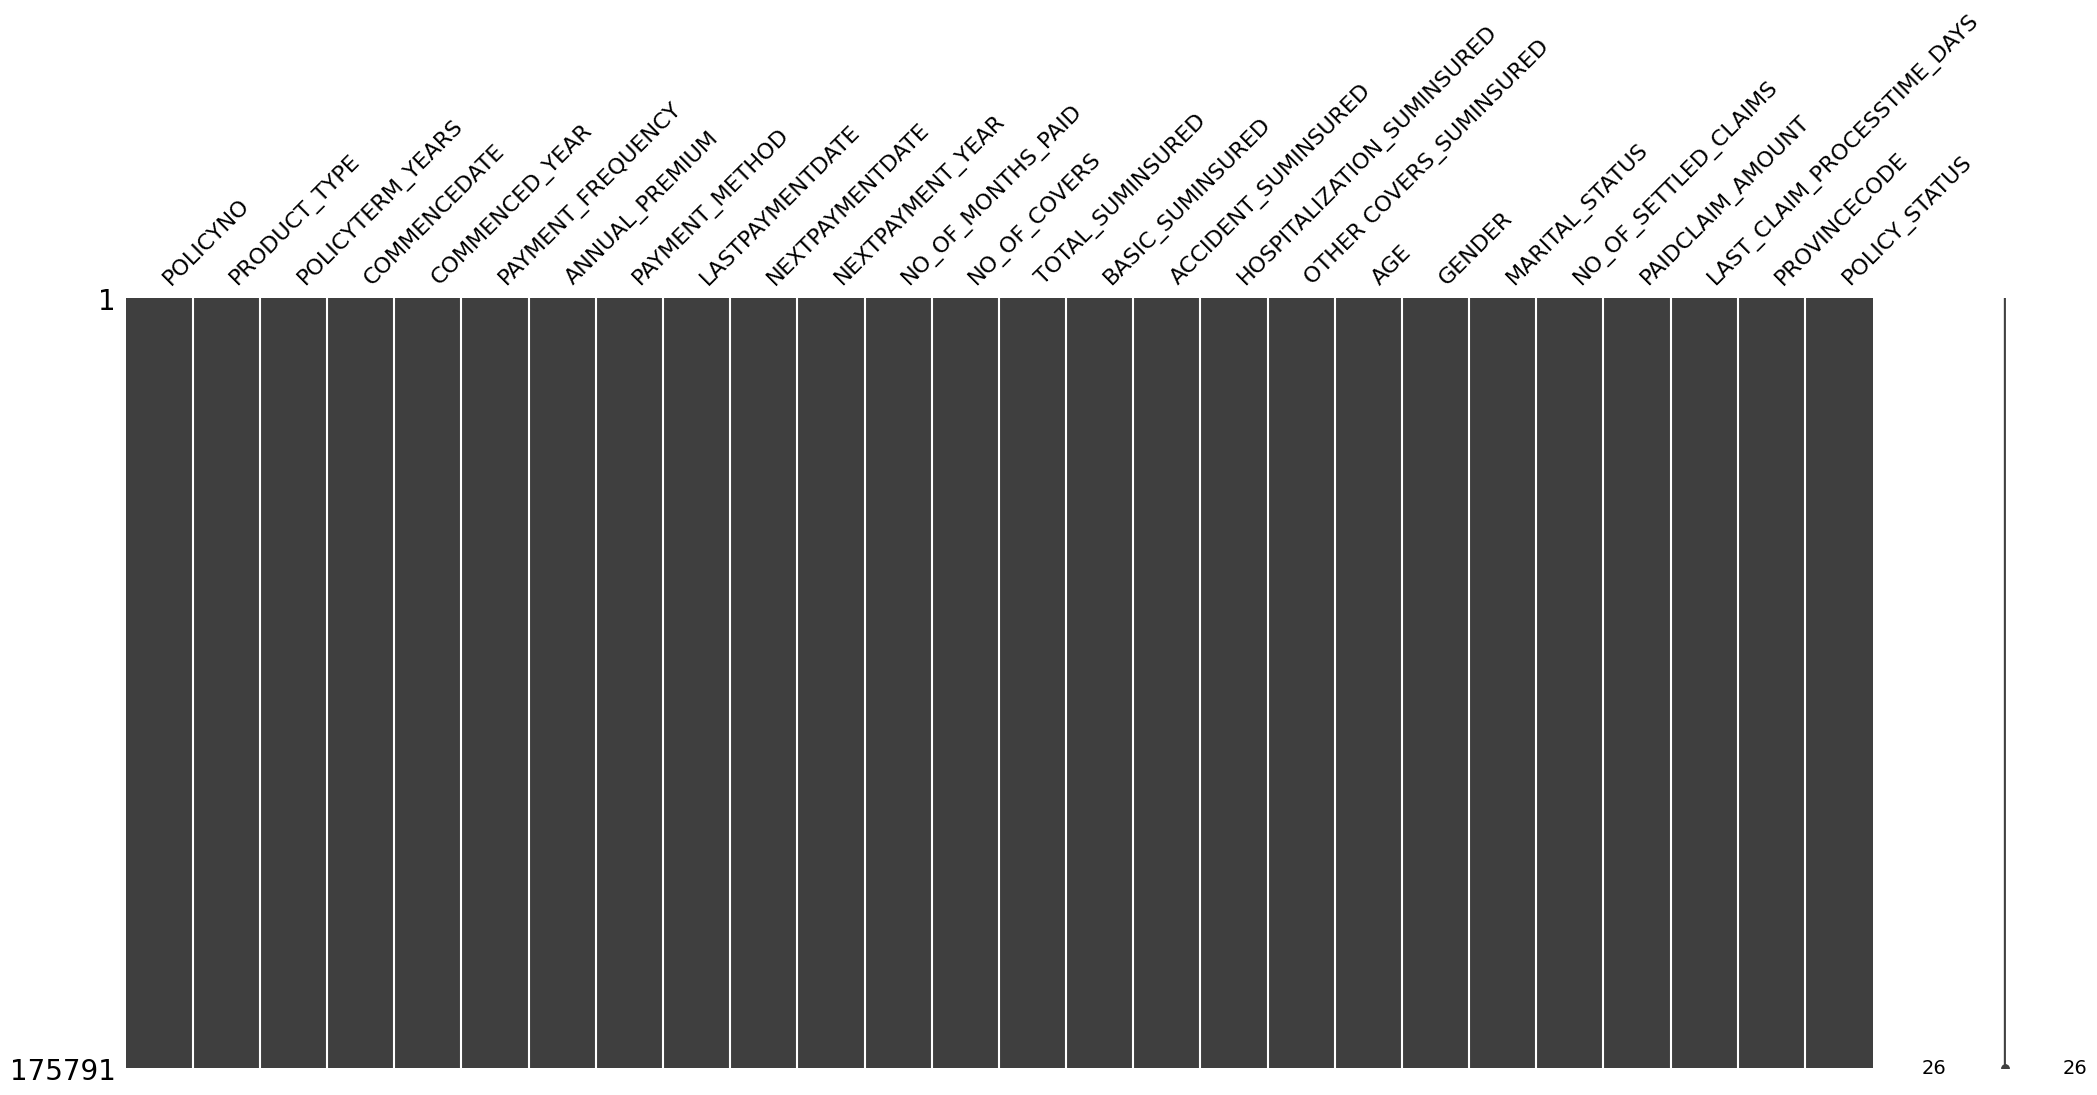

In [50]:
#Visualize Missing Values
msno.matrix(df1)


In [51]:
df1.isnull().any().any()

False

In [52]:
df1.isnull().sum()

POLICYNO                       0
PRODUCT_TYPE                   0
POLICYTERM_YEARS               0
COMMENCEDATE                   0
COMMENCED_YEAR                 0
PAYMENT_FREQUENCY              0
ANNUAL_PREMIUM                 0
PAYMENT_METHOD                 0
LASTPAYMENTDATE                0
NEXTPAYMENTDATE                0
NEXTPAYMENT_YEAR               0
NO_OF_MONTHS_PAID              0
NO_OF_COVERS                   0
TOTAL_SUMINSURED               0
BASIC_SUMINSURED               0
ACCIDENT_SUMINSURED            0
HOSPITALIZATION_SUMINSURED     0
OTHER COVERS_SUMINSURED        0
AGE                            0
GENDER                         0
MARITAL_STATUS                 0
NO_OF_SETTLED_CLAIMS           0
PAIDCLAIM_AMOUNT               0
LAST_CLAIM_PROCESSTIME_DAYS    0
PROVINCECODE                   0
POLICY_STATUS                  0
dtype: int64

In [53]:
#Checking Duplicates

print('Known observations: {}\nUnique observations: {}'.format(len(df1.index),len(df1.drop_duplicates().index)))

print("**No duplicates Found!**")

Known observations: 175791
Unique observations: 175791
**No duplicates Found!**


In [54]:
df1 = df1.drop(["POLICYNO","COMMENCEDATE","LASTPAYMENTDATE","NEXTPAYMENTDATE","PROVINCECODE"], axis = 1)
df1.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,NO_OF_MONTHS_PAID,NO_OF_COVERS,TOTAL_SUMINSURED,...,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,POLICY_STATUS
0,ENDOW,49,2017,M,24732,CASH,2017,1,1,500000,...,0,0,0,32,M,M,0,0,0,LAPSE
1,ENDOW,49,2017,M,24732,CASH,2017,1,1,500000,...,0,0,0,32,M,M,0,0,0,LAPSE
2,ENDOW,49,2017,M,24732,CASH,2017,1,1,500000,...,0,0,0,32,M,M,0,0,0,LAPSE
3,ENDOW,49,2017,M,24732,CASH,2017,1,1,500000,...,0,0,0,32,F,M,0,0,0,LAPSE
4,ENDOW,49,2017,M,24732,CASH,2017,1,1,500000,...,0,0,0,32,M,M,0,0,0,LAPSE


In [55]:
df1.describe(include=['object']).T

,count,unique,top,freq
PRODUCT_TYPE,175791,2,ENDOW,150064
PAYMENT_FREQUENCY,175791,4,M,140678
PAYMENT_METHOD,175791,3,CASH,160722
GENDER,175791,2,M,114530
MARITAL_STATUS,175791,2,M,140537
POLICY_STATUS,175791,2,LAPSE,156950


In [56]:
# Shows statistical summaries for all numeric columns
df1.describe()

,POLICYTERM_YEARS,COMMENCED_YEAR,ANNUAL_PREMIUM,NEXTPAYMENT_YEAR,NO_OF_MONTHS_PAID,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS
count,175791.000000,175791.000000,1.757910e+05,175791.000000,175791.000000,175791.000000,1.757910e+05,1.757910e+05,1.757910e+05,1.757910e+05,1.757910e+05,175791.000000,175791.000000,1.757910e+05,175791.000000
mean,23.735720,2016.089544,5.365460e+04,2017.205255,13.690707,3.136628,2.474662e+06,7.895238e+05,9.413125e+05,3.934087e+05,3.504172e+05,34.977752,0.098879,2.629889e+03,3.354114
std,11.555351,4.028817,8.783135e+04,4.377116,26.710407,1.256307,2.763663e+06,8.157095e+05,1.401510e+06,5.989737e+05,6.447110e+05,9.609733,0.667061,2.874498e+04,53.223974
min,5.000000,2010.000000,1.200000e+04,2010.000000,1.000000,1.000000,5.023000e+04,4.068000e+03,0.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,0.000000e+00,0.000000
25%,16.000000,2012.000000,2.166000e+04,2013.000000,1.000000,2.000000,7.350000e+05,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,28.000000,0.000000,0.000000e+00,0.000000
50%,20.000000,2016.000000,3.164400e+04,2017.000000,4.000000,4.000000,1.745000e+06,5.625000e+05,6.000000e+05,2.700000e+05,2.000000e+05,33.000000,0.000000,0.000000e+00,0.000000
75%,25.000000,2020.000000,6.204000e+04,2022.000000,12.000000,4.000000,3.150000e+06,1.000000e+06,1.125000e+06,5.400000e+05,5.000000e+05,42.000000,0.000000,0.000000e+00,0.000000
max,49.000000,2022.000000,9.979720e+06,2033.000000,240.000000,6.000000,1.110258e+08,5.102576e+07,6.000000e+07,2.000000e+07,2.500000e+07,87.000000,20.000000,2.050000e+06,2816.000000


In [57]:

type_ = ["LAPSE", "ACTIVE"]
fig = make_subplots(rows=1, cols=1)

# Define custom colors
custom_colors = ['#EF553B', '#636EFA']  # You can change these colors as needed

# Create the figure and pie chart
fig = go.Figure()

# Add a Pie trace with data labels and custom colors
fig.add_trace(go.Pie(
    labels=type_,
    values=df1['POLICY_STATUS'].value_counts(),
    name="POLICY_STATUS",
    textinfo='label+percent',
    marker=dict(colors=custom_colors),
))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, textfont_size=12)

fig.update_layout(
    title_text="Active vs Lapse Policy Distribution",
    title_x=0.55,
    title_y=0.90,
    annotations=[dict(text='POLICY STATUS', x=0.5, y=-0.1, font_size=12, showarrow=False)],
    
    # Move the legend to the bottom
    legend=dict(x=0.4, y=-0.3),

    # Reduce chart size by setting height and width
    height=400,
    width=550,
)

fig.show()

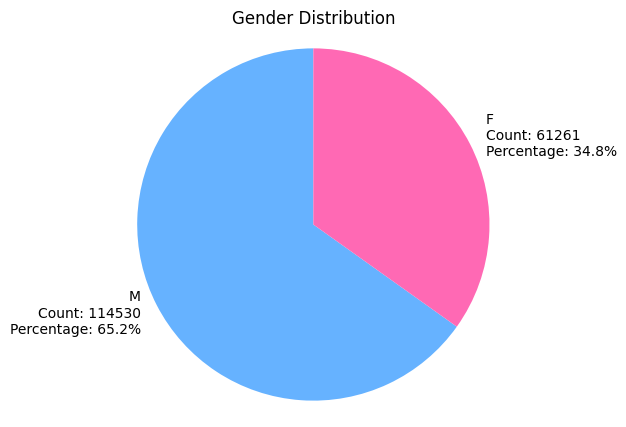

In [58]:
# Calculate gender counts
gender_counts = df1['GENDER'].value_counts()

# Calculate percentages
total_count = len(df1)
gender_percentages = (gender_counts / total_count) * 100

# Define custom colors
custom_colors = ['#66B2FF', 'hotpink']  # Custom colors for Male and Female

# Create pie chart labels with gender, count, and percentage
labels = gender_counts.index
labels_with_info = [f"{gender}\nCount: {count}\nPercentage: {percentage:.1f}%" for gender, count, percentage in zip(labels, gender_counts, gender_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Gender Distribution")

# Display the chart
plt.axis('equal')
plt.show()

In [59]:
df1.POLICY_STATUS.groupby(by = df1.GENDER).count()

GENDER
F     61261
M    114530
Name: POLICY_STATUS, dtype: int64

In [60]:
df1.GENDER[df1.GENDER == "M"].groupby(by = df1.POLICY_STATUS).count()

POLICY_STATUS
ACTIVE     11772
LAPSE     102758
Name: GENDER, dtype: int64

In [61]:
df1.GENDER[df1.GENDER == "F"].groupby(by = df1.POLICY_STATUS).count()

POLICY_STATUS
ACTIVE     7069
LAPSE     54192
Name: GENDER, dtype: int64

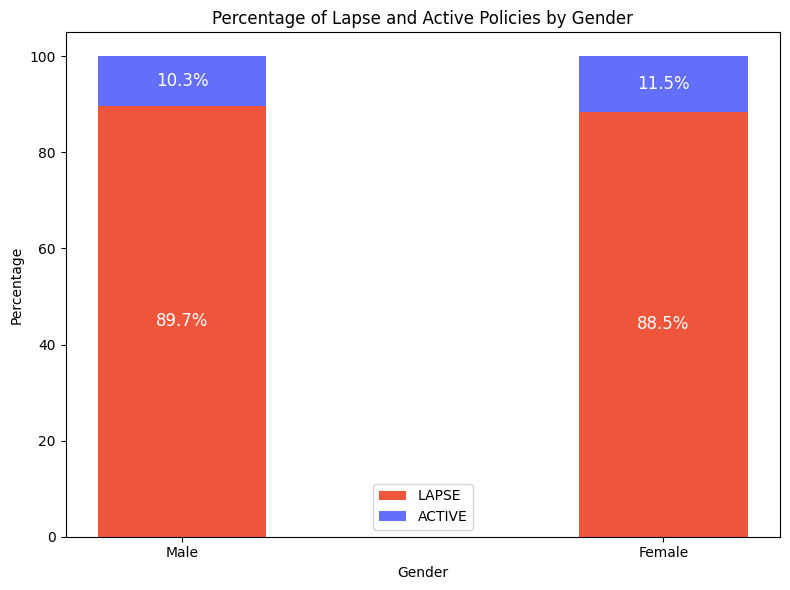

In [62]:
# Data
genders = ["Male", "Female"]
lapse_percentage = [102758 / 114530 * 100, 54192 / 61261 * 100]
active_percentage = [11772 / 114530 * 100, 7069 / 61261 * 100]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the stacked bar chart
bar_width = 0.35
index = range(len(genders))
p1 = ax.bar(index, lapse_percentage, bar_width, label="LAPSE", color="#EF553B")
p2 = ax.bar(index, active_percentage, bar_width, bottom=lapse_percentage, label="ACTIVE", color="#636EFA")

# Set labels, title, and legend
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Lapse and Active Policies by Gender")
ax.set_xticks(index)
ax.set_xticklabels(genders)
ax.legend()

# Add percentages on top of the bars
for i, (p1_height, p2_height) in enumerate(zip(lapse_percentage, active_percentage)):
    ax.annotate(f"{p1_height:.1f}%", (i, p1_height / 2), ha="center", va="center", fontsize=12, color="white")
    ax.annotate(f"{p2_height:.1f}%", (i, p1_height + p2_height / 2), ha="center", va="center", fontsize=12, color="white")

# Show the plot
plt.tight_layout()
plt.show()